In [134]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('vgsales.csv')
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [138]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [140]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [142]:
total_rows = df.shape[0]
print(f"Total number of items (rows): {total_rows}")

Total number of items (rows): 16598


In [144]:
df.dropna(inplace=True)

In [146]:
print(df.isnull().sum())
total_rows = df.shape[0]
print(f"Total number of items (rows): {total_rows}")

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Total number of items (rows): 16291


In [148]:
print(df.duplicated().sum())

0


In [201]:
number_publishers = df['Publisher'].nunique()

print(f"Number of unique publishers: {number_publishers}")

Number of unique publishers: 578


In [154]:
games_2017_and_up = df[df['Year'] >= 2017]
print(games_2017_and_up[['Name', 'Year']])

                                                   Name    Year
5957                             Imagine: Makeup Artist  2020.0
14390  Phantasy Star Online 2 Episode 4: Deluxe Package  2017.0
16241  Phantasy Star Online 2 Episode 4: Deluxe Package  2017.0
16438                  Brothers Conflict: Precious Baby  2017.0


In [156]:
df_filtered = df[(df['Year'] >= 1980) & (df['Year'] <= 2020)]

top_10_games = df_filtered.sort_values(by='Global_Sales', ascending=False).head(10)
print(top_10_games[['Name', 'Global_Sales', 'Publisher', 'Year']])

                        Name  Global_Sales Publisher    Year
0                 Wii Sports         82.74  Nintendo  2006.0
1          Super Mario Bros.         40.24  Nintendo  1985.0
2             Mario Kart Wii         35.82  Nintendo  2008.0
3          Wii Sports Resort         33.00  Nintendo  2009.0
4   Pokemon Red/Pokemon Blue         31.37  Nintendo  1996.0
5                     Tetris         30.26  Nintendo  1989.0
6      New Super Mario Bros.         30.01  Nintendo  2006.0
7                   Wii Play         29.02  Nintendo  2006.0
8  New Super Mario Bros. Wii         28.62  Nintendo  2009.0
9                  Duck Hunt         28.31  Nintendo  1984.0


In [199]:
unique_genres = df['Genre'].unique()
number_genres = len(unique_genres)

print(f'Number of unique genres: {number_genres}')
print('Unique genres:', unique_genres)

Number of unique genres: 12
Unique genres: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


<Figure size 1200x800 with 0 Axes>

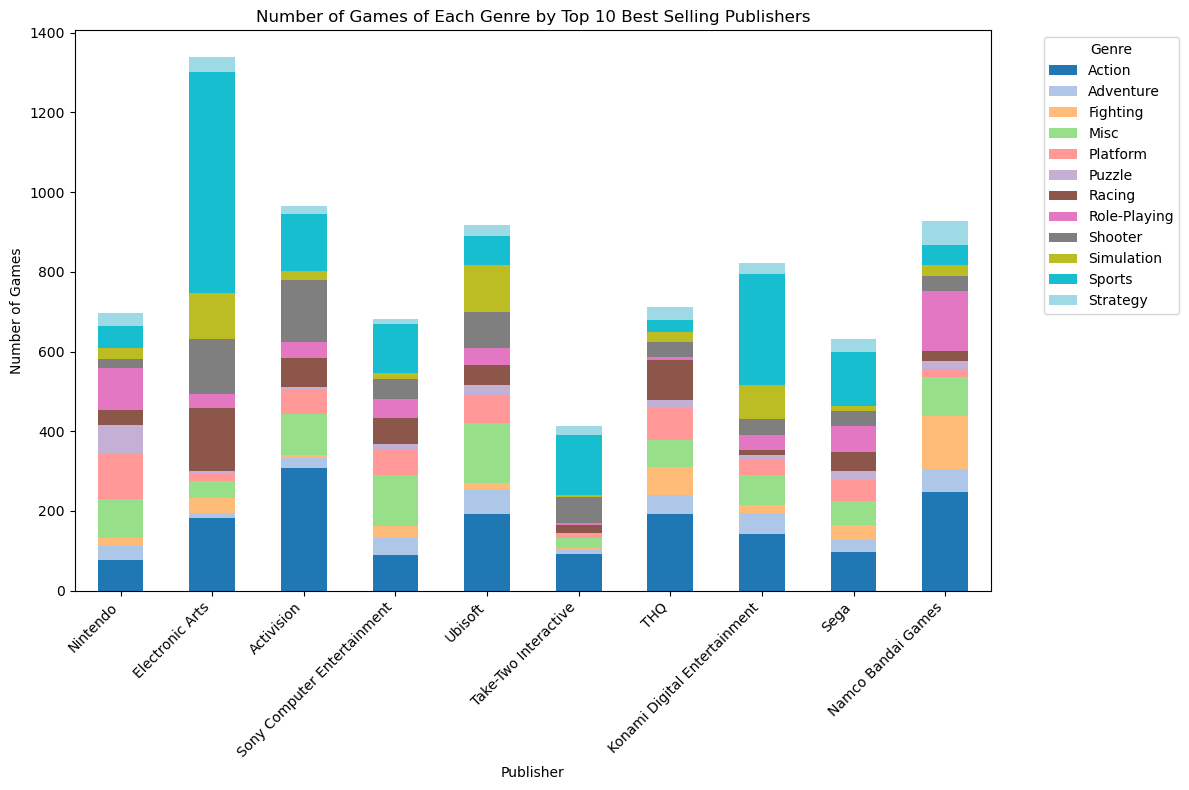

In [160]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index

df_top_publishers = df[df['Publisher'].isin(top_publishers)]

genre_counts = df_top_publishers.groupby(['Publisher', 'Genre']).size().unstack(fill_value=0)

genre_counts = genre_counts.loc[top_publishers]

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))

plt.title('Number of Games of Each Genre by Top 10 Best Selling Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

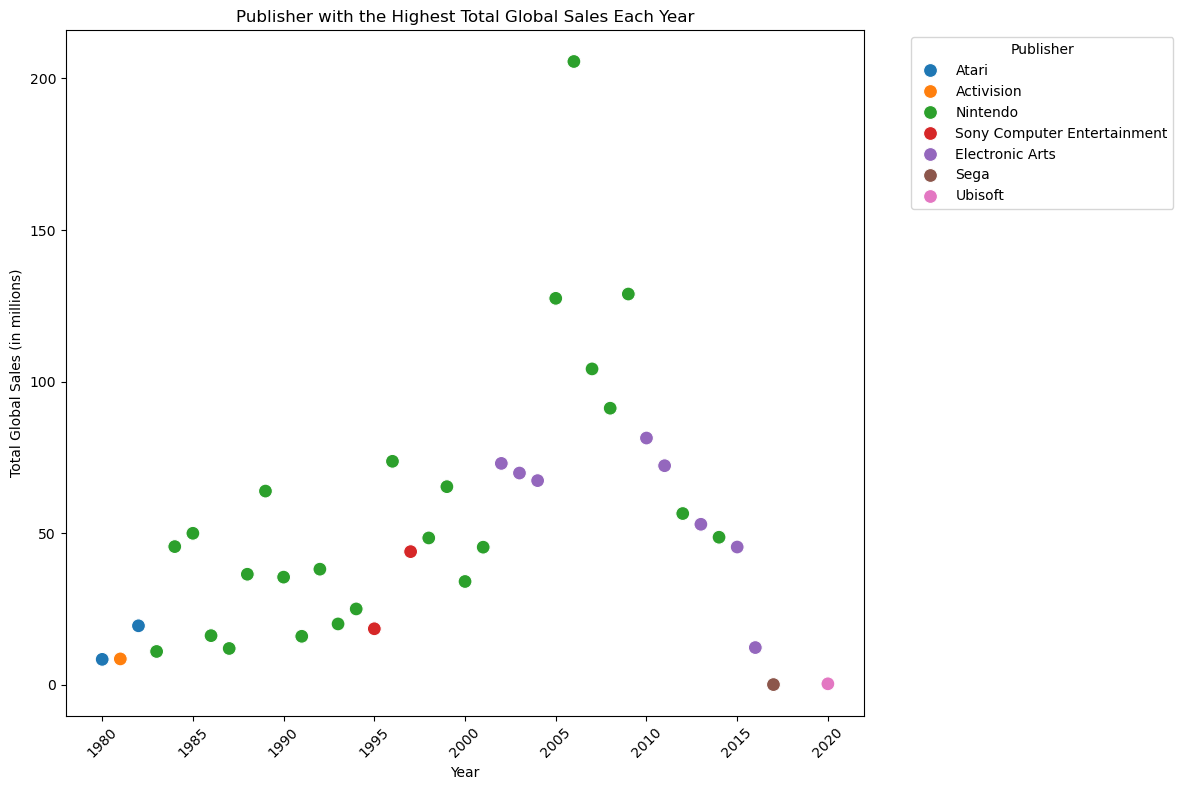

In [197]:
sales_publisher_year = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()

idx = sales_publisher_year.groupby('Year')['Global_Sales'].idxmax()
top_publishers_per_year = sales_publisher_year.loc[idx]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_publishers_per_year, x='Year', y='Global_Sales', hue='Publisher', palette='tab10', s=100)

plt.title('Publisher with the Highest Total Global Sales Each Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

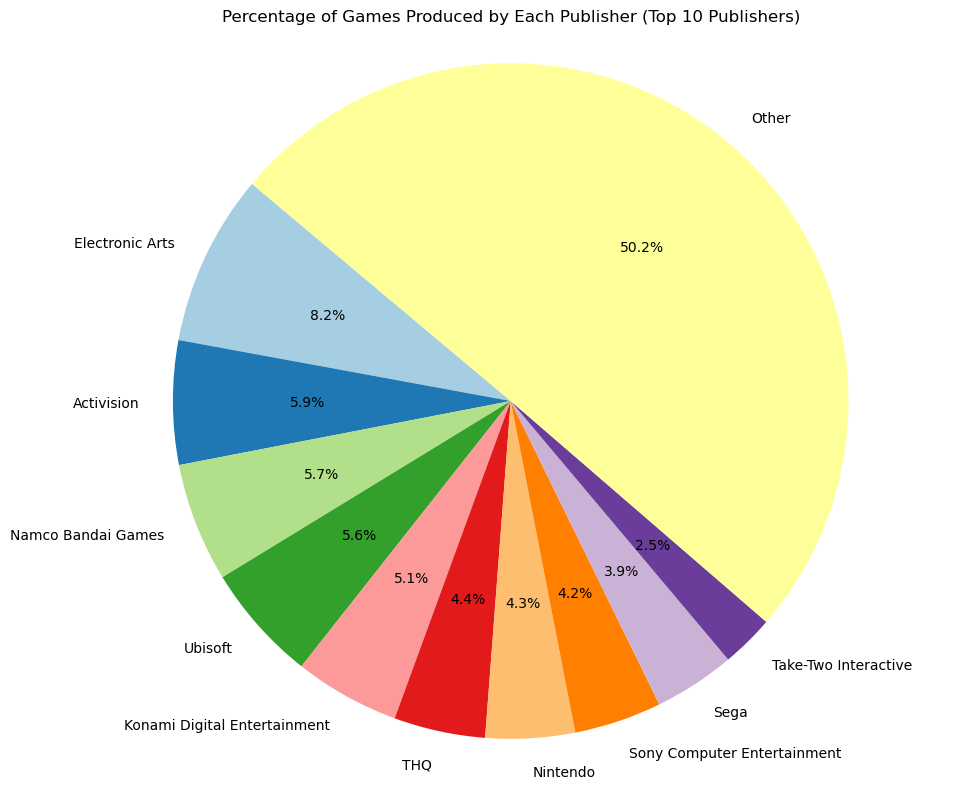

In [164]:
publisher_counts = df['Publisher'].value_counts()

top_publishers = publisher_counts.head(10)

other_publisher_count = publisher_counts[10:].sum()
top_publishers = pd.concat([top_publishers, pd.Series([other_publisher_count], index=['Other'])])

plt.figure(figsize=(10, 8))
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(top_publishers))))

plt.title('Percentage of Games Produced by Each Publisher (Top 10 Publishers)')
plt.axis('equal')

plt.tight_layout()
plt.show()

In [166]:
num_publishers = df['Publisher'].nunique()
print(f'Number of unique publishers in the dataset: {num_publishers}')

Number of unique publishers in the dataset: 576


In [195]:
total_revenue_per_genre = df.groupby('Publisher')['Global_Sales'].sum().reset_index()
total_revenue_per_genre = total_revenue_per_genre.sort_values(by='Global_Sales', ascending=False)
print(total_revenue_per_genre)

                       Publisher  Global_Sales
359                     Nintendo       1786.56
138              Electronic Arts       1110.32
21                    Activision        727.46
456  Sony Computer Entertainment        607.50
525                      Ubisoft        474.72
..                           ...           ...
375                    Ongakukan          0.01
96                      Commseed          0.01
495                       Takuyo          0.01
76                      Boost On          0.01
350                   Naxat Soft          0.01

[578 rows x 2 columns]


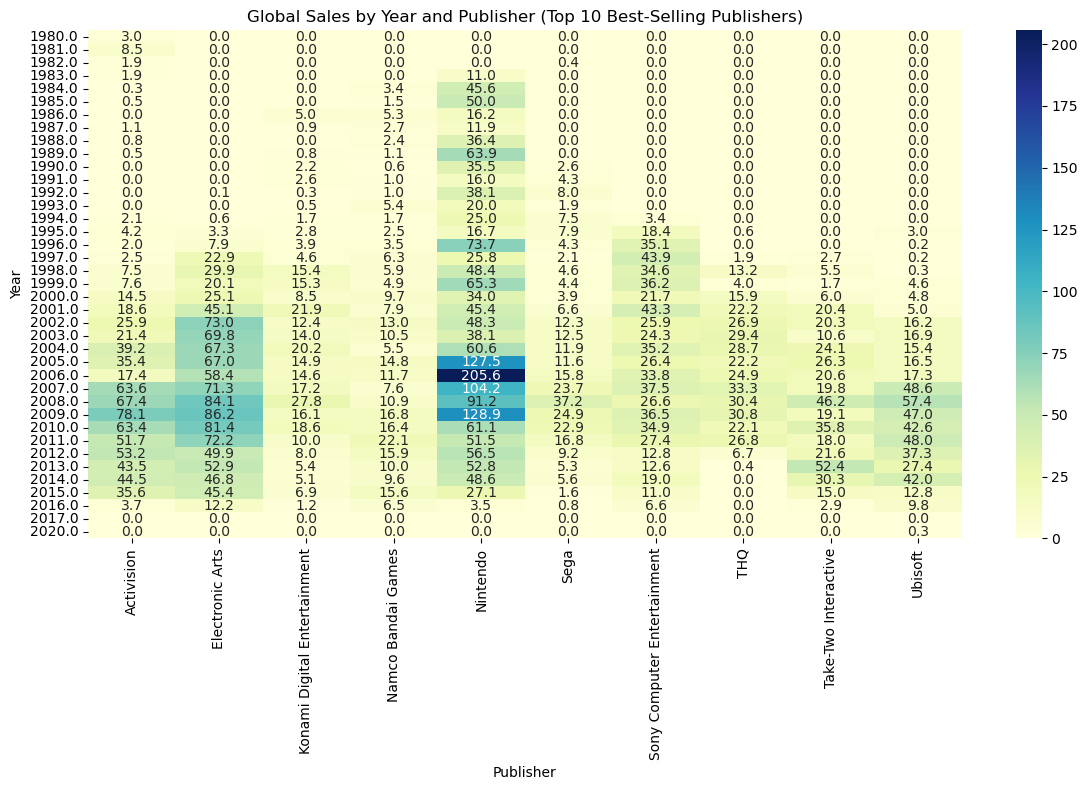

In [193]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index

df_filtered = df[df['Publisher'].isin(top_publishers)]

sales_year_publisher = df_filtered.groupby(['Year', 'Publisher'])['Global_Sales'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(sales_year_publisher, cmap='YlGnBu', annot=True, fmt='.1f')

plt.title('Global Sales by Year and Publisher (Top 10 Best-Selling Publishers)')
plt.xlabel('Publisher')
plt.ylabel('Year')

plt.tight_layout()
plt.show()